# 03_01 S

https://www.kaggle.com/viridisquotient/arimax

In [1]:
import data_prep_helper
import statsmodels.api as sm
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt

In [2]:
do = data_prep_helper.ShiftChartData(chart_col=["Price","High","Low"])

In [3]:
corr_df = do.chart_df

In [4]:
do.apply_boll_bands("bitcoin_hist", append_chart=True)

In [5]:
corr_df = corr_df.resample('D').interpolate()

In [6]:
corr_df

,bitcoin_Price,bitcoin_High,bitcoin_Low,sp500_Price,sp500_High,sp500_Low,dax_Price,dax_High,dax_Low,googl_Price,...,amazon_Low,bitcoin_Google_Trends,cryptocurrency_Google_Trends,trading_Google_Trends,bitcoin_pos_sents,bitcoin_neg_sents,bitcoin_quot_sents,economy_pos_sents,economy_neg_sents,economy_quot_sents
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-08,282.700000,292.700000,279.000000,2062.140000,2064.080000,2030.610000,9837.610000,9855.43,9607.900000,506.91,...,296.110000,442.000000,1.000000,1676.000000,0.132016,0.026372,5.005926,0.056556,0.048854,1.157653
2015-01-09,288.000000,290.600000,277.300000,2044.810000,2064.430000,2038.330000,9648.500000,9860.18,9601.750000,500.72,...,296.680000,456.000000,0.000000,1632.000000,0.107098,0.043874,2.441031,0.108603,0.072891,1.489947
2015-01-10,281.766667,284.766667,272.633333,2039.293333,2059.386667,2033.080000,9692.966667,9845.44,9608.606667,499.50,...,294.213333,433.666667,1.666667,1596.666667,0.111551,0.042656,2.625713,0.087473,0.063169,1.337974
2015-01-11,275.533333,278.933333,267.966667,2033.776667,2054.343333,2027.830000,9737.433333,9830.70,9615.463333,498.28,...,291.746667,411.333333,3.333333,1561.333333,0.116005,0.041437,2.810395,0.066344,0.053448,1.186002
2015-01-12,269.300000,273.100000,263.300000,2028.260000,2049.300000,2022.580000,9781.900000,9815.96,9622.320000,497.06,...,289.280000,389.000000,5.000000,1526.000000,0.120459,0.040219,2.995077,0.045214,0.043726,1.034030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-06,9134.800000,9165.200000,9004.900000,2972.370000,2985.930000,2901.540000,11541.870000,11769.85,11447.200000,1295.74,...,1869.500000,826.000000,163.000000,659.000000,0.143554,0.057431,2.499613,0.129544,0.109882,1.178937
2020-03-07,8734.200000,8829.733333,8552.833333,2897.100000,2945.250000,2845.836667,11236.253333,11511.64,11150.346667,1269.09,...,1833.430000,963.000000,129.000000,791.333333,0.154202,0.083767,2.095165,0.130619,0.123359,1.080385
2020-03-08,8333.600000,8494.266667,8100.766667,2821.830000,2904.570000,2790.133333,10930.636667,11253.43,10853.493333,1242.44,...,1797.360000,1100.000000,95.000000,923.666667,0.164849,0.110103,1.690716,0.131694,0.136836,0.981832


In [6]:
corr_df = corr_df.diff().dropna()

In [7]:
#creating the train and validation set
train = corr_df[:int(0.8*(len(corr_df)))]
valid = corr_df[int(0.8*(len(corr_df))):]

In [8]:
#creating the train and validation set
#train = corr_df[:1200]
#valid = corr_df[1200:1500]

In [9]:
valid.head()

,bitcoin_Price,bitcoin_High,bitcoin_Low,sp500_Price,sp500_High,sp500_Low,dax_Price,dax_High,dax_Low,googl_Price,...,amazon_Low,bitcoin_Google_Trends,cryptocurrency_Google_Trends,trading_Google_Trends,bitcoin_pos_sents,bitcoin_neg_sents,bitcoin_quot_sents,economy_pos_sents,economy_neg_sents,economy_quot_sents
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-27,3814.600000,3836.400000,3701.900000,2792.380000,2795.760000,2775.130000,11487.330000,11521.220000,11442.970000,1122.890000,...,1615.100000,1394.0,138.000000,1924.000000,0.142965,0.045438,3.146393,0.146298,0.072706,2.012184
2019-02-28,3816.600000,3883.700000,3783.300000,2784.490000,2793.730000,2782.510000,11515.640000,11524.990000,11416.080000,1126.550000,...,1633.830000,1353.0,133.000000,1886.000000,0.173313,0.054280,3.192955,0.122750,0.063006,1.948232
2019-03-01,3821.900000,3855.800000,3816.400000,2803.690000,2808.020000,2787.380000,11601.680000,11676.860000,11583.080000,1148.520000,...,1651.000000,1263.0,132.000000,1793.000000,0.202935,0.073970,2.743461,0.107520,0.050496,2.129264
2019-03-02,3786.566667,3846.666667,3771.533333,2800.063333,2810.973333,2780.806667,11598.673333,11668.053333,11585.966667,1150.153333,...,1658.786667,1266.0,131.666667,1810.666667,0.175708,0.079913,2.269259,0.111910,0.053782,2.086067
2019-03-03,3751.233333,3837.533333,3726.666667,2796.436667,2813.926667,2774.233333,11595.666667,11659.246667,11588.853333,1151.786667,...,1666.573333,1269.0,131.333333,1828.333333,0.148480,0.085856,1.795057,0.116300,0.057069,2.042869


In [10]:
train = do.get_causal_const_shift(train, past="all")

In [11]:
valid= do.get_causal_const_shift(valid, past="all")

In [12]:
train["economy_pos_sents_prev_month"] = train["economy_pos_sents_prev_month"].rolling(window=10,min_periods=1).mean()


In [13]:
#resDiff = sm.tsa.arma_order_select_ic(train["bitcoin_Price"], max_ar=7, max_ma=7, ic='aic', trend='c')

In [14]:
#resDiff

In [15]:
features = ['cryptocurrency_Google_Trends_prev_week', 'cryptocurrency_Google_Trends_prev_month', 'amazon_Price_prev_week']
#features = ['bitcoin_Google_Trends_prev_week', 'alibaba_Low_prev_month', 'amazon_Low_prev_week', 'bitcoin_Price_prev_week']
#features = ['cryptocurrency_Google_Trends_prev_week', 'month-2', 'economy_pos_sents_prev_week']
#features = ['cryptocurrency_Google_Trends_prev_week', 'amazon_High_prev_month', 'amazon_Price_prev_week']
#features = ['cryptocurrency_Google_Trends_prev_month',
# 'alibaba_High_prev_month',
# 'amazon_High_prev_month',
# 'economy_pos_sents_prev_month']

features = ['bitcoin_Google_Trends_prev_month',
                               'cryptocurrency_Google_Trends_prev_month',
                               'alibaba_High_prev_month',
                               'amazon_High_prev_month',
                               'economy_pos_sents_prev_month']

In [16]:
%%time
s1i1 = train['bitcoin_Price']
exog_s1i1 = train[features]
    

arimax = sm.tsa.statespace.SARIMAX(s1i1, 
                                   exog=exog_s1i1,
                                   enforce_invertibility=False, 
                                   enforce_stationarity=False, 
                                   freq='D').fit()
print(arimax.summary())

                               SARIMAX Results                                
Dep. Variable:          bitcoin_Price   No. Observations:                 1480
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -10406.624
Date:                Sun, 12 Apr 2020   AIC                          20827.247
Time:                        16:56:30   BIC                          20864.341
Sample:                    02-08-2015   HQIC                         20841.076
                         - 02-26-2019                                         
Covariance Type:                  opg                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
bitcoin_Google_Trends_prev_month            0.1020      0.070      1.455      0.146      -0.035       0.239
cryptocurrency_Google_Trends_prev_month    -

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



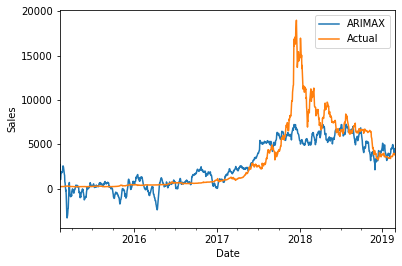

In [17]:


exog = train[features]
forecast =  arimax.predict( dynamic=True, exog=exog)
actual = train["bitcoin_Price"]

forecast.plot()
actual.plot()
plt.legend(['ARIMAX', 'Actual'])
plt.ylabel('Sales');



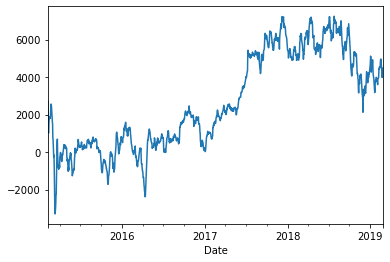

In [18]:
forecast.plot()

In [19]:
exog = valid[features]

In [20]:
exog

,bitcoin_Google_Trends_prev_month,cryptocurrency_Google_Trends_prev_month,alibaba_High_prev_month,amazon_High_prev_month,economy_pos_sents_prev_month
Date,,,,,
2019-03-30,1394.000000,138.000000,184.930000,1641.810000,0.146298
2019-03-31,1353.000000,133.000000,184.300000,1651.770000,0.122750
2019-04-01,1263.000000,132.000000,186.900000,1674.260000,0.107520
2019-04-02,1266.000000,131.666667,187.046667,1685.983333,0.111910
2019-04-03,1269.000000,131.333333,187.193333,1697.706667,0.116300
...,...,...,...,...,...
2020-03-06,1586.000000,114.000000,224.380000,2059.800000,0.117186
2020-03-07,1708.000000,118.000000,226.700000,2071.020000,0.139224
2020-03-08,1778.000000,116.000000,223.650000,2056.300000,0.103303


In [241]:
test = exog[exog.index < "2020-02-10"]

In [242]:
test["cryptocurrency_Google_Trends"] = test["cryptocurrency_Google_Trends_prev_week"].shift(-7)
test["cryptocurrency_Google_Trends_prev_3_week"] = test["cryptocurrency_Google_Trends_prev_month"].shift(-7)
test["amazon_Price"] = test["amazon_Price_prev_week"].shift(-7)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [243]:
test = test.iloc[:-7,:]

In [21]:
#features = ['cryptocurrency_Google_Trends',
# 'alibaba_High',
# 'amazon_High',
# 'economy_pos_sents']

features = ['bitcoin_Google_Trends',
                               'cryptocurrency_Google_Trends',
                               'alibaba_High',
                               'amazon_High',
                               'economy_pos_sents']

In [52]:
valid_chart = do.chart_df[(do.chart_df.index <= valid.index.max()) & (do.chart_df.index > train.index.max())][features]
real_price = do.chart_df[(do.chart_df.index <= valid.index.max()) & (do.chart_df.index > train.index.max())]['bitcoin_Price']

In [53]:
valid_chart["economy_pos_sents"] = valid_chart["economy_pos_sents"].rolling(window=10,min_periods=1).mean()


In [61]:
valid_chart_30 = valid_chart.shift(10, fill_value=0)

In [62]:
valid_chart.head(10)

,bitcoin_Google_Trends,cryptocurrency_Google_Trends,alibaba_High,amazon_High,economy_pos_sents
Date,,,,,
2019-02-27,1394.0,138.000000,184.930000,1641.810000,0.146298
2019-02-28,1353.0,133.000000,184.300000,1651.770000,0.140411
2019-03-01,1263.0,132.000000,186.900000,1674.260000,0.135448
2019-03-02,1266.0,131.666667,187.046667,1685.983333,0.132116
2019-03-03,1269.0,131.333333,187.193333,1697.706667,0.129884
2019-03-04,1272.0,131.000000,187.340000,1709.430000,0.128388
2019-03-05,1329.0,137.000000,188.080000,1707.800000,0.127232
2019-03-06,1331.0,133.000000,185.590000,1697.750000,0.126341
2019-03-07,1393.0,140.000000,181.800000,1669.750000,0.125809


In [63]:
valid_chart["economy_pos_sents"] = valid_chart["economy_pos_sents"].rolling(window=10,min_periods=1).mean()


In [64]:
forecast = arimax.get_forecast(steps=len(valid_chart), exog=valid_chart, return_conf_int=True)

In [65]:
forecast_30 = arimax.get_forecast(steps=len(valid_chart_30), exog=valid_chart_30)

In [66]:
import plotly.graph_objects as go

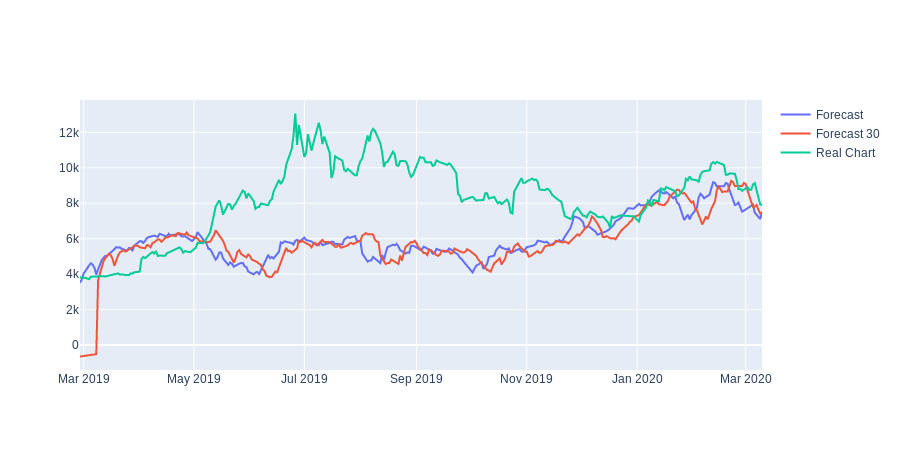

In [67]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.predicted_mean.index, 
                             y=forecast.predicted_mean,
                             name="Forecast"))

fig.add_trace(go.Scatter(x=forecast_30.predicted_mean.index, 
                             y=forecast_30.predicted_mean,
                             name="Forecast 30"))

fig.add_trace(go.Scatter(x=real_price.index, 
                             y=real_price,
                             name="Real Chart"))



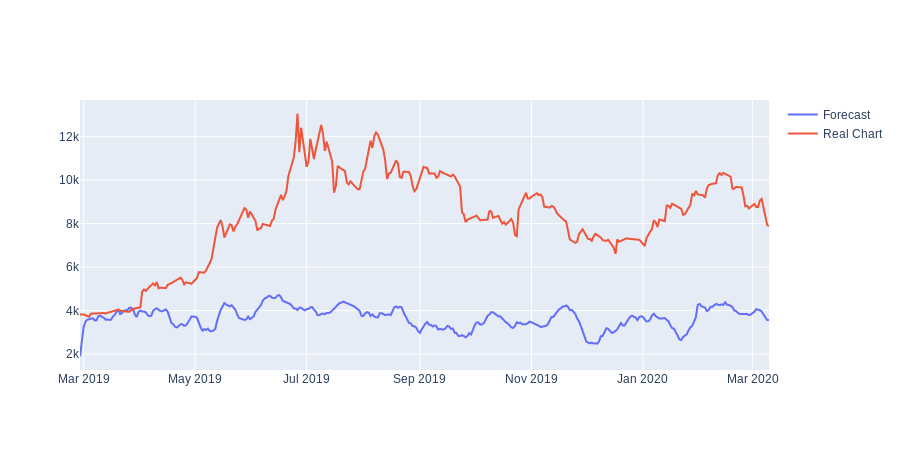

In [328]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.predicted_mean.index, 
                             y=forecast.predicted_mean,
                             name="Forecast"))

fig.add_trace(go.Scatter(x=real_price.index, 
                             y=real_price,
                             name="Real Chart"))

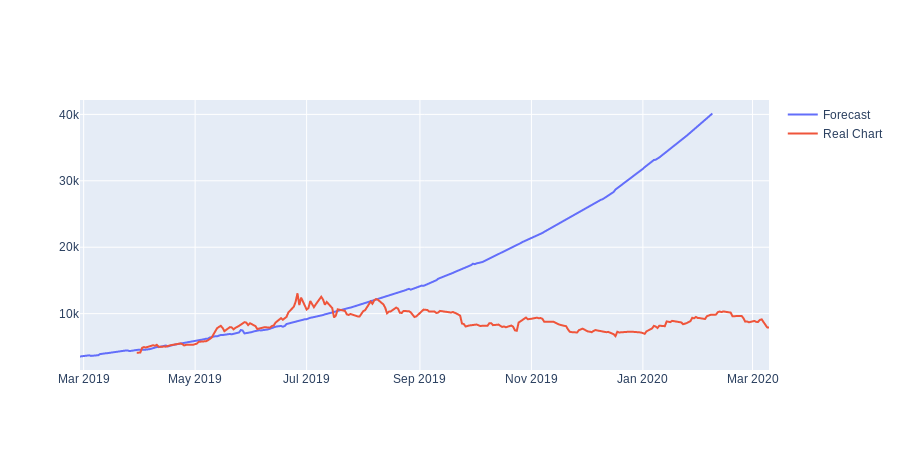

In [230]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.predicted_mean.index, 
                             y=forecast.predicted_mean,
                            name="Forecast"))

fig.add_trace(go.Scatter(x=valid.index, 
                             y=valid["bitcoin_Price"],
                             name="Real Chart"))

In [165]:
sqrt(mean_squared_error(forecast.predicted_mean, valid["bitcoin_Price"]))

5383.573842003448

In [209]:
#sqrt(mean_squared_error(forecast.predicted_mean, valid["bitcoin_Price"][valid.index < "2020-02-03"]))

2137.022453324655

In [24]:
np.corrcoef(forecast.predicted_mean,valid["bitcoin_Price"].values)[0][1]

0.3543141471680157

In [152]:
sqrt(mean_squared_error((var_forecast["bitcoin_Price"].values + forecast.predicted_mean[:255].values), valid["bitcoin_Price"][:255]))

NameError: name 'var_forecast' is not defined

In [229]:
valid.index.strftime("%Y-%m-%d")[30:-30]

Index(['2019-04-29', '2019-04-30', '2019-05-01', '2019-05-02', '2019-05-03',
       '2019-05-04', '2019-05-05', '2019-05-06', '2019-05-07', '2019-05-08',
       ...
       '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
       '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09'],
      dtype='object', name='Date', length=287)